In [1]:
! pip install web3 dotenv pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 217.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 418.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 108.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 182.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 112.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 181.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 206.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.8/444.8 kB 181.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 118.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 123.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 137.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━

In [2]:
# Importing the Web3 object from web3.py
# dotenv is imported for loading the Gateway environment variable from .env file
# Remember that the Gateway we created has an API key in it (unique identifier for the API caller)

from web3 import Web3
import pandas as pd
from dotenv import load_dotenv
import os

# Loading environment variables from .env file

load_dotenv()
GATEWAY = os.getenv("GATEWAY_URL")

print(f'GATEWAY imported as {GATEWAY}')

GATEWAY imported as https://mainnet.infura.io/v3/14b83f0d989a4d67bb9181a343654d0e


In [3]:
w3 = Web3(Web3.HTTPProvider(GATEWAY))
print(f'Is the connection successful?: {w3.is_connected()}') # Should return True

Is the connection successful?: True


In [4]:
def turn_to_checksum(address: str) -> str:
    """Convert an Ethereum address to its checksum format"""
    if not Web3.is_checksum_address(address): # check if already checksum
        return Web3.to_checksum_address(address) # if not we return checksum address
    return address

ACCOUNT_ADDRESS_RAW = "0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84"
ACCOUNT_ADDRESS = turn_to_checksum(ACCOUNT_ADDRESS_RAW)

In [5]:
# Get number of transactions for a given address

def get_transaction_count(address: str) -> int:
    return w3.eth.get_transaction_count(address) # use the get_transaction_count method and pass through the address

get_transaction_count(ACCOUNT_ADDRESS)

5

In [7]:
# Fetch details for a transaction using transaction hash

tx_hash = "0x50f6678c427392209a6a12dfa9bfd258503526ba4e4e2d80b27cf4b7579696a6"
transaction = w3.eth.get_transaction(tx_hash)
print(f'Transaction Details: {transaction}')
# print("From:", transaction['from']) # Sender address
# print("To:", transaction['to']) # Recipient address
# print("Value (ETH):", w3.from_wei(transaction['value'], 'ether')) # Transaction value in ETH
# print("Gas Used:", transaction['gas']) # Gas used for the transaction

Transaction Details: AttributeDict({'blockHash': HexBytes('0xf20aa677f9bad06b472f2734570992e6b74e07d0c07e5fba516b8924af5da024'), 'blockNumber': 22227671, 'from': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84', 'gas': 21000, 'gasPrice': 951249593, 'maxFeePerGas': 1147752425, 'maxPriorityFeePerGas': 512247655, 'hash': HexBytes('0x50f6678c427392209a6a12dfa9bfd258503526ba4e4e2d80b27cf4b7579696a6'), 'input': HexBytes('0x'), 'nonce': 2, 'to': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525', 'transactionIndex': 53, 'value': 4784490000000000, 'type': 2, 'accessList': [], 'chainId': 1, 'v': 0, 'r': HexBytes('0xab6dc09a1d9d85b6127af452f7f42b186d81240751d9022f9b9b198f04ee3139'), 's': HexBytes('0x24df5499c17941337a4d11f1162ac2db049ef467a9418692d21b832ec163a4dd'), 'yParity': 0})


In [8]:
# Fetch details for a transaction using transaction hash


print("From:", transaction['from']) # Sender address
print("To:", transaction['to']) # Recipient address
print("Value (ETH):", w3.from_wei(transaction['value'], 'ether')) # Transaction value in ETH
print("Gas Used:", transaction['gas']) # Gas used for the transaction

From: 0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84
To: 0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525
Value (ETH): 0.00478449
Gas Used: 21000


In [9]:
def get_tx_details(tx_hash: str) -> dict:
    """Fetches transaction details for a given transaction hash."""
    try:
        transaction = w3.eth.get_transaction(tx_hash)
    except Exception as e:
        print(f"Error fetching transaction details: {e}")
        return {}
    
    return {
        "from": transaction['from'],
        "to": transaction['to'],
        "value (ETH)": w3.from_wei(transaction['value'], 'ether'),
        "gas used": transaction['gas']
    }
    
get_tx_details("0x34fcc447050e420b0a397d0de36f699e27a86ef0f5f28a6932c0f9b8247a51c4")

{'from': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525',
 'to': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84',
 'value (ETH)': Decimal('0.01'),
 'gas used': 21000}

In [11]:
# Checking the latest block number

latest_block = w3.eth.get_block('latest')  

print("Block Number:", latest_block['number'])  
print("Block Hash:", latest_block['hash'].hex())  
print("Transactions in Block:", len(latest_block['transactions']))
print("baseFeePerGas:", latest_block['baseFeePerGas'])

Block Number: 23183835
Block Hash: 410e4dd6796b6cc47b29b9dfc1a1f6dd4aff6c9ee91925c2663681858f2f897e
Transactions in Block: 416
baseFeePerGas: 596511825


In [12]:
# Ether Balance

raw_balance = w3.eth.get_balance(ACCOUNT_ADDRESS)
normalized_balance = w3.from_wei(raw_balance, 'ether')

print(f"Ether Balance for {ACCOUNT_ADDRESS}: {normalized_balance} ETH")

Ether Balance for 0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84: 0.003843781825617197 ETH


full erc20 ABI  https://gist.github.com/veox/8800debbf56e24718f9f483e1e40c35c

In [13]:
# Token Balance

BINANCE_ACCOUNT_ADDRESS_RAW = "0xe1940f578743367F38D3f25c2D2d32D6636929B6"
BINANCE_ACCOUNT_ADDRESS = turn_to_checksum(BINANCE_ACCOUNT_ADDRESS_RAW)

USDC_ADDRESS = "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48" # Ethereum USDC Address
ERC20_ABI = [
    {
        "constant": True,
        "inputs": [{"name": "_owner", "type": "address"}],
        "name": "balanceOf",
        "outputs": [{"name": "balance", "type": "uint256"}],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
    {
        "constant": True,
        "inputs": [],
        "name": "totalSupply",
        "outputs": [
            {
                "name": "",
                "type": "uint256"
            }
        ],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
    {
        "constant": True,
        "inputs": [],
        "name": "decimals",
        "outputs": [
            {
                "name": "",
                "type": "uint8"
            }
        ],
        "payable": False,
        "stateMutability": "view",
        "type": "function"
    },
]

usdc_contract = w3.eth.contract(address=USDC_ADDRESS, abi=ERC20_ABI) # Create contract client to interact with the contract functions
decimals = usdc_contract.functions.decimals().call()
raw_balance = usdc_contract.functions.balanceOf(BINANCE_ACCOUNT_ADDRESS).call() # pass address to balanceOf function
normalized_balance = raw_balance / 10 ** decimals

print(f"USDC Balance for {BINANCE_ACCOUNT_ADDRESS}: {normalized_balance:,.0f} USDC")

USDC Balance for 0xe1940f578743367F38D3f25c2D2d32D6636929B6: 1,399,999,999 USDC


In [14]:
def get_balances(address: str, tokens: list) -> dict:
    """Gets Ether and token balances for a given address."""
    raw_ether_balance = w3.eth.get_balance(address)
    normalized_ether_balance = w3.from_wei(raw_ether_balance, 'ether')

    if tokens:
        balances = {}
        for token in tokens:
            token_contract = w3.eth.contract(address=token, abi=ERC20_ABI)
            raw_balance = token_contract.functions.balanceOf(address).call()
            decimals = token_contract.functions.decimals().call()
            normalized_balance = raw_balance / 10 ** decimals
            balances[token] = normalized_balance
        return {"ether": normalized_ether_balance, "tokens": balances}
    return {"ether": normalized_ether_balance}

get_balances(BINANCE_ACCOUNT_ADDRESS, [USDC_ADDRESS])

{'ether': 0,
 'tokens': {'0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48': 1399999999.009477}}

In [15]:
# First we identify topic0; unique hash for ERC20 transfer events

erc20_transfer_topic = w3.keccak(text="Transfer(address,address,uint256)").hex() # function name and arguments as a hex string
if '0x' not in erc20_transfer_topic:
    erc20_transfer_topic = '0x' + erc20_transfer_topic
erc20_transfer_topic

'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'

In [16]:
def address_to_topic(address: str) -> str:
    """Convert an Ethereum address into a 32-byte topic string"""
    return Web3.to_hex(Web3.to_bytes(hexstr=address).rjust(32, b'\0')) #Ethereum addresses are only 20 bytes long, so we pad with zeros for the API

logs = w3.eth.get_logs({
    "fromBlock": "earliest",
    "toBlock": "latest",
    "address": USDC_ADDRESS,
    "topics": [erc20_transfer_topic, None, address_to_topic(ACCOUNT_ADDRESS)] # Topic 0 is the Transfer event signature, Topic 1 is the sender (null for all), Topic 2 is the recipient
})

print(len(logs), "token transfers found")
print(f'logs: {logs}')

1 token transfers found
logs: [AttributeDict({'removed': False, 'logIndex': 366, 'transactionIndex': 130, 'transactionHash': HexBytes('0xe5f7a61bc1c31a9442a02854f5b941f390b66a0e46a5f48cc490e791f1480e2d'), 'blockHash': HexBytes('0x846ba7b32e8993d9011b3aa928eaca039a495b5b05b7c71e9fc5e77a96f947c2'), 'blockNumber': 22227642, 'address': '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48', 'data': HexBytes('0x00000000000000000000000000000000000000000000000000000000000f416e'), 'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'), HexBytes('0x0000000000000000000000002083b0413869f7b5b9e0ea27d20cb6dd3535f525'), HexBytes('0x00000000000000000000000038979dfdb5d8fd76fad4e797c4660e20015c6a84')]})]


In [17]:
# Decode logs into readable transfers

transfers = []
for log in logs:
    from_addr = "0x" + log["topics"][1].hex()[-40:]  # last 20 bytes as ethereum address is only 20 bytes long
    to_addr   = "0x" + log["topics"][2].hex()[-40:]

    # handle both hexstring or bytes case
    if isinstance(log["data"], bytes):
        value = int.from_bytes(log["data"], byteorder="big")
    else:
        value = int(log["data"], 16) # interpret this string as base-16 (hexadecimal)

    # We can get the timestamp by looking up the block
    block = w3.eth.get_block(log["blockNumber"]) 
    timestamp = block.timestamp

    # We append the transfer details to transfers list
    transfers.append({
        "block": block.number,
        "timestamp": timestamp,
        "tx": log["transactionHash"].hex(),
        "from": Web3.to_checksum_address(from_addr),
        "to": Web3.to_checksum_address(to_addr),
        "value": (value / 10 ** decimals) # normalize value using the decimals
    })

for t in transfers[:5]:  # print first 5
    print(t)

{'block': 22227642, 'timestamp': 1744157015, 'tx': 'e5f7a61bc1c31a9442a02854f5b941f390b66a0e46a5f48cc490e791f1480e2d', 'from': '0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525', 'to': '0x38979DFdB5d8FD76FAD4E797c4660e20015C6a84', 'value': 0.99979}


In [18]:
def get_token_transfers(address: str, token_address: str, from_block: str = "earliest", to_block: str = "latest") -> list:
    """Retreives token transfers for a given address (tokens sent to the recipient)"""
    logs = w3.eth.get_logs({
        "fromBlock": from_block,
        "toBlock": to_block,
        "address": token_address,
        "topics": [erc20_transfer_topic, None, address_to_topic(address)]
    })

    token_contract = w3.eth.contract(address=token_address, abi=ERC20_ABI)
    decimals = token_contract.functions.decimals().call()

    # Decode logs into readable transfers
    transfers = []
    for log in logs:
        from_addr = "0x" + log["topics"][1].hex()[-40:]  # last 20 bytes
        to_addr   = "0x" + log["topics"][2].hex()[-40:]
        hash      = "0x" + log["transactionHash"].hex()

        # handle both hexstring or bytes case
        if isinstance(log["data"], bytes):
            value = int.from_bytes(log["data"], byteorder="big")
        else:
            value = int(log["data"], 16) # interpret this string as base-16 (hexadecimal)

        block = w3.eth.get_block(log["blockNumber"])
        timestamp = block.timestamp

        transfers.append({
            "block": block.number,
            "timestamp": str(pd.to_datetime(timestamp, unit='s')),
            "tx": hash,
            "from": Web3.to_checksum_address(from_addr),
            "to": Web3.to_checksum_address(to_addr),
            "value": (value / 10 ** decimals) # normalize value using the decimals
        })

    return transfers

transfers = get_token_transfers(BINANCE_ACCOUNT_ADDRESS, USDC_ADDRESS)

In [ ]:
transfers_df = pd.DataFrame(transfers)
transfers_df


,block,timestamp,tx,from,to,value
0,21385773,2024-12-12 10:17:11,0x8c92c649708d48cd4e4effc0e09496b7a563055891fa...,0x3d2419F94e38646DeeB009eDDbE562De2919d87B,0xe1940f578743367F38D3f25c2D2d32D6636929B6,2.000000e+00
1,21392378,2024-12-13 08:24:47,0x847d7da257d1732bf536d1d7a9024380a897535608f3...,0xD6153F5af5679a75cC85D8974463545181f48772,0xe1940f578743367F38D3f25c2D2d32D6636929B6,1.000948e+01
2,21392388,2024-12-13 08:26:47,0xd9081337c35d613ee49d9a492d25bc378556d9576063...,0xD6153F5af5679a75cC85D8974463545181f48772,0xe1940f578743367F38D3f25c2D2d32D6636929B6,2.200000e+08
3,21400934,2024-12-14 13:04:35,0x0d8bb77f6042bdc666e9118f74b95c734e80a27e0a4d...,0xD6153F5af5679a75cC85D8974463545181f48772,0xe1940f578743367F38D3f25c2D2d32D6636929B6,2.200089e+08
4,21407867,2024-12-15 12:17:47,0x535703f843343ba486c24502569c430d59b810f457df...,0xD6153F5af5679a75cC85D8974463545181f48772,0xe1940f578743367F38D3f25c2D2d32D6636929B6,2.216424e+08
5,22523343,2025-05-20 09:48:59,0xfe4190ffccbf410f5648aae3b0039a0c92fb3f9f9ffd...,0xF977814e90dA44bFA03b6295A0616a897441aceC,0xe1940f578743367F38D3f25c2D2d32D6636929B6,7.383487e+08


<Axes: xlabel='timestamp'>

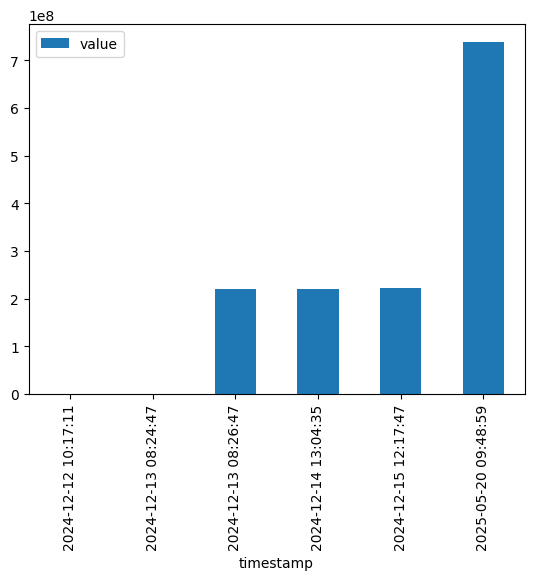

In [21]:
transfers_df.set_index('timestamp', inplace=True)
transfers_df.index = pd.to_datetime(transfers_df.index)
transfers_df[['value']].plot(kind='bar')

In [22]:
from ens import ENS # automatically included in web3.py

ns = ENS.from_web3(w3) # client for ENS API


In [ ]:
# lookup by domain brandynham.eth
domain = "brandynham.eth"
resolved = ns.address(domain) #pass through the domain to the address method
print(f'domain: {domain}')
print(f'address: {resolved}')

domain: brandynham.eth
address: 0x2083b0413869f7b5b9e0eA27d20CB6dD3535f525


In [24]:
# lookup by address
test_address_raw = "0x6cf624aca916066340f0347375c5e87a8c250d38"
test_address = turn_to_checksum(test_address_raw)
domain = ns.name(test_address) # Pass through address to the name method
print(f'address: {test_address}')
print(f'domain: {domain}')

address: 0x6Cf624AcA916066340F0347375c5E87A8C250D38
domain: lll111.eth
